In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
cancer = datasets.load_breast_cancer()

In [13]:
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [6]:
y = pd.Series(cancer.target)

In [9]:
# PCA

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
sc = StandardScaler()

In [15]:
X = sc.fit_transform(X)

In [17]:
X.shape

(569, 30)

In [18]:
pca = PCA(n_components = 2)

In [20]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'copy',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'n_components',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'svd_solver',
 'tol',
 'transform',
 'whiten']

In [23]:
pca_data = pca.fit_transform(X)

In [29]:
len(cancer.feature_names)

30

In [30]:
pca_data_df = pd.DataFrame(pca_data, columns = ['PCA 1', 'PCA 2'])

In [31]:
pca_data_df

,PCA 1,PCA 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [35]:
X_pca_two = pca_data_df

In [36]:
X_pca_two

,PCA 1,PCA 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


Text(0, 0.5, 'PCA 2')

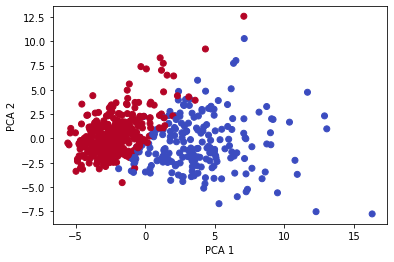

In [47]:
plt.figure()
plt.scatter(X_pca_two.iloc[:,0], X_pca_two.iloc[:,1], c = y, cmap = plt.cm.coolwarm)
plt.xlabel(X_pca_two.columns[0])
plt.ylabel(X_pca_two.columns[1])

In [64]:
cnt_0 = 0
cnt_1 = 0
for data in y:
    if data: cnt_1+=1
    else: cnt_0+=1
print(cnt_1, cnt_0)

357 212


0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568     True
Length: 569, dtype: bool

In [65]:
from sklearn import svm

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'PCA 2')

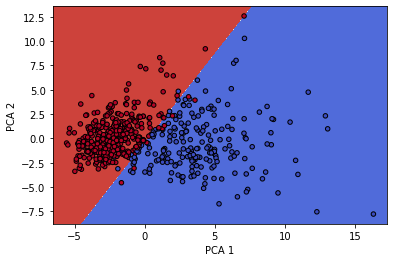

In [72]:
clf = svm.SVC(kernel = 'linear')
h = 0.02
x_min, x_max, = X_pca_two.iloc[:,0].min()-1,  X_pca_two.iloc[:,0].max()+1
y_min, y_max, = X_pca_two.iloc[:,1].min()-1,  X_pca_two.iloc[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
clf.fit(X_pca_two, y)
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
plt.scatter(X_pca_two.iloc[:,0], X_pca_two.iloc[:,1], c=y, cmap = plt.cm.coolwarm, s=20, edgecolor = 'k')
plt.xlabel(X_pca_two.columns[0])
plt.ylabel(X_pca_two.columns[1])





In [ ]:
# dimensionality Reduction PCA 

In [73]:
iris = datasets.load_iris()

In [74]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)

In [75]:
y = pd.Series(iris.target)

In [76]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64

In [77]:
sc = StandardScaler()

In [78]:
X_scaled = sc.fit_transform(X)

In [84]:
X_scaled.shape

(150, 4)

In [79]:
pca = PCA(n_components=2)

In [80]:
pca_data = pca.fit_transform(X_scaled)

In [85]:
pca_data.shape

(150, 2)

In [86]:
X_pca = pd.DataFrame(pca_data, columns = ['PCA 1', 'PCA 2'])

In [87]:
X_pca.head()

,PCA 1,PCA 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [104]:
# RandomForest

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [94]:
clf_rf = RandomForestClassifier(n_estimators = 100, random_state = 123)

In [96]:
scores = cross_val_score(clf_rf, X, y, scoring = 'accuracy', cv=5)

In [97]:
scores

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [98]:
scores_pca = cross_val_score(clf_rf, X_pca, y, scoring = 'accuracy', cv=5)

In [100]:
scores_pca < scores

array([ True,  True,  True,  True, False])

In [101]:
np.mean(scores)

0.96

In [102]:
np.mean(scores_pca)

0.9

In [103]:
# clustering 

In [176]:
X, y = datasets.make_blobs(n_samples = 300, centers = 5, random_state=123)

In [111]:
X.shape, y.shape

((300, 2), (300,))

In [177]:
y

array([1, 3, 0, 0, 4, 0, 0, 4, 0, 3, 1, 2, 2, 2, 2, 2, 1, 0, 0, 4, 2, 1,
       3, 0, 4, 4, 0, 0, 2, 4, 1, 1, 2, 2, 0, 4, 2, 4, 1, 3, 1, 3, 4, 1,
       3, 0, 3, 1, 1, 1, 3, 3, 4, 1, 4, 0, 2, 3, 4, 4, 0, 0, 0, 2, 2, 4,
       0, 4, 2, 1, 0, 3, 0, 3, 4, 1, 2, 1, 0, 2, 1, 2, 4, 2, 3, 2, 2, 4,
       4, 2, 4, 3, 1, 1, 0, 0, 1, 0, 0, 0, 4, 0, 3, 2, 4, 2, 1, 3, 4, 4,
       1, 0, 2, 2, 1, 0, 1, 2, 3, 1, 2, 4, 4, 4, 1, 1, 0, 1, 4, 0, 0, 4,
       2, 0, 3, 0, 3, 4, 4, 3, 4, 3, 0, 4, 1, 3, 2, 3, 2, 4, 3, 0, 0, 3,
       1, 4, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 3, 1, 1, 4, 4, 1, 1, 3, 0, 2,
       0, 3, 3, 4, 4, 3, 1, 3, 4, 4, 3, 3, 4, 2, 1, 4, 1, 0, 2, 3, 0, 0,
       4, 3, 2, 4, 4, 0, 2, 3, 2, 0, 2, 0, 4, 3, 4, 1, 3, 4, 1, 1, 3, 2,
       0, 1, 2, 2, 1, 4, 2, 3, 3, 3, 2, 2, 3, 3, 3, 4, 2, 2, 3, 0, 1, 1,
       4, 3, 1, 2, 1, 4, 4, 1, 2, 2, 0, 1, 2, 0, 3, 2, 4, 3, 3, 1, 1, 4,
       0, 2, 3, 2, 2, 3, 3, 1, 3, 2, 2, 2, 1, 4, 3, 1, 3, 0, 2, 4, 1, 4,
       1, 0, 2, 3, 0, 2, 3, 0, 3, 1, 4, 3, 1, 0])

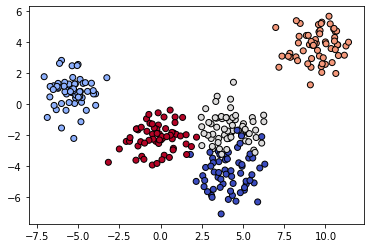

In [190]:
plt.scatter(X[:,0], X[:,1], c=y, cmap= plt.cm.coolwarm, edgecolor = 'k')

In [191]:
# k-means clustering

In [192]:
from sklearn.cluster import KMeans

In [193]:
km = KMeans(n_clusters = 5 )

In [194]:
km.fit(X)

KMeans(n_clusters=5)

In [195]:
y_pred_km = km.predict(X)

In [196]:
y_pred_km

array([3, 1, 4, 4, 0, 4, 4, 0, 4, 1, 3, 2, 2, 2, 2, 2, 3, 2, 4, 0, 2, 3,
       1, 4, 0, 0, 4, 4, 2, 0, 3, 3, 2, 2, 4, 0, 2, 0, 3, 1, 3, 1, 2, 3,
       1, 4, 1, 3, 3, 3, 1, 1, 0, 3, 0, 4, 2, 1, 0, 0, 4, 4, 2, 2, 2, 0,
       4, 0, 2, 3, 2, 1, 4, 1, 0, 3, 2, 3, 4, 2, 3, 2, 0, 2, 1, 2, 2, 0,
       0, 2, 0, 1, 3, 3, 2, 4, 3, 4, 4, 4, 0, 4, 1, 2, 0, 2, 3, 1, 0, 0,
       3, 4, 2, 2, 3, 4, 3, 2, 1, 3, 4, 0, 0, 0, 3, 3, 4, 3, 0, 4, 4, 0,
       2, 4, 1, 4, 1, 0, 0, 1, 0, 1, 4, 0, 3, 1, 2, 1, 2, 0, 1, 4, 0, 1,
       3, 0, 2, 3, 3, 2, 4, 4, 4, 4, 3, 2, 1, 3, 3, 0, 0, 3, 3, 1, 4, 2,
       4, 1, 1, 0, 0, 1, 3, 1, 0, 0, 1, 1, 0, 2, 3, 0, 3, 4, 2, 1, 4, 4,
       0, 1, 2, 0, 0, 4, 2, 1, 2, 2, 2, 4, 0, 1, 0, 3, 1, 0, 3, 3, 1, 2,
       4, 3, 2, 2, 3, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 4, 3, 3,
       0, 1, 3, 2, 3, 0, 0, 3, 2, 2, 4, 3, 2, 4, 1, 2, 0, 1, 1, 3, 3, 0,
       4, 2, 1, 2, 2, 1, 1, 3, 1, 2, 2, 2, 3, 0, 1, 3, 1, 4, 2, 0, 3, 0,
       3, 4, 2, 1, 4, 2, 1, 4, 1, 3, 0, 1, 3, 2], d

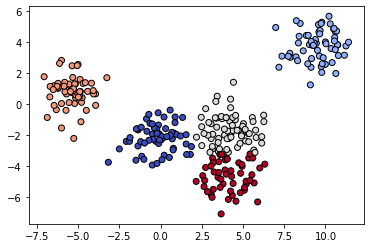

In [197]:
plt.scatter(X[:,0], X[:,1], c=y_pred_km, cmap= plt.cm.coolwarm, edgecolor = 'k')

In [198]:
centroid = km.cluster_centers_

In [200]:
centroid

array([[-0.18793117, -2.16830578],
       [ 9.50257442,  3.77427211],
       [ 4.21884369, -1.62183828],
       [-5.39760796,  0.81624797],
       [ 4.13964156, -4.64476656]])

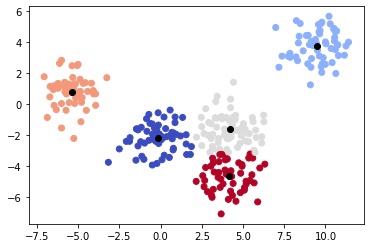

In [201]:
plt.scatter(X[:,0], X[:,1], c = y_pred_km, cmap = plt.cm.coolwarm)
plt.scatter(centroid[:,0],centroid[:,1], c='black')

In [202]:
km4 = KMeans(n_clusters =4 )

In [203]:
km4.fit(X)

KMeans(n_clusters=4)

In [204]:
y_pred_km4 = km4.predict(X)

In [205]:
centroids_km4 = km4.cluster_centers_

In [206]:
centroids_km4

array([[ 9.50257442,  3.77427211],
       [-0.18793117, -2.16830578],
       [-5.39760796,  0.81624797],
       [ 4.18386275, -2.95696494]])

In [207]:
centroid

array([[-0.18793117, -2.16830578],
       [ 9.50257442,  3.77427211],
       [ 4.21884369, -1.62183828],
       [-5.39760796,  0.81624797],
       [ 4.13964156, -4.64476656]])

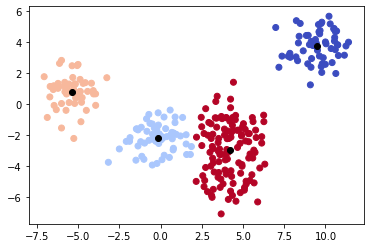

In [208]:
plt.scatter(X[:,0], X[:,1], c = y_pred_km4, cmap = plt.cm.coolwarm)
plt.scatter(centroids_km4[:,0], centroids_km4[:,1], c='black')

In [209]:
km3 = KMeans(n_clusters = 3)

In [210]:
km3.fit(X)

KMeans(n_clusters=3)

In [211]:
y_pred_km3 = km3.predict(X)

In [212]:
centroid_km3 = km3.cluster_centers_

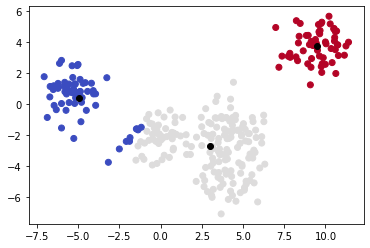

In [213]:
plt.scatter(X[:,0], X[:,1], c=y_pred_km3, cmap=plt.cm.coolwarm)
plt.scatter(centroid_km3[:,0], centroid_km3[:,1], c='black')

In [214]:
km6 = KMeans(n_clusters=6)

In [215]:
km6.fit(X)

KMeans(n_clusters=6)

In [216]:
y_pred_km6 = km6.predict(X)

In [217]:
centroid_km6 = km6.cluster_centers_

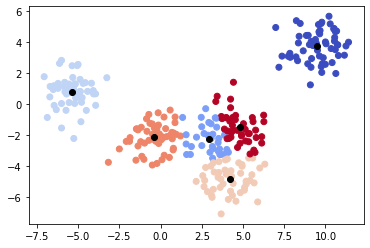

In [218]:
plt.scatter(X[:,0],X[:,1], c=y_pred_km6, cmap = plt.cm.coolwarm)
plt.scatter(centroid_km6[:,0], centroid_km6[:,1], c='black')

In [219]:
# un

In [220]:
index1 = y_pred_km == 1
index3 = y_pred_km == 3

In [221]:
index1

array([False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [233]:
y_pred_km[index1] = 3 
y_pred_km[index3] = 1

In [234]:
y_pred_km


array([1, 3, 4, 4, 0, 4, 4, 0, 4, 3, 1, 3, 3, 3, 3, 3, 1, 3, 4, 0, 3, 1,
       3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 3, 3, 4, 0, 3, 0, 1, 3, 1, 3, 3, 1,
       3, 4, 3, 1, 1, 1, 3, 3, 0, 1, 0, 4, 3, 3, 0, 0, 4, 4, 3, 3, 3, 0,
       4, 0, 3, 1, 3, 3, 4, 3, 0, 1, 3, 1, 4, 3, 1, 3, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 1, 1, 3, 4, 1, 4, 4, 4, 0, 4, 3, 3, 0, 3, 1, 3, 0, 0,
       1, 4, 3, 3, 1, 4, 1, 3, 3, 1, 4, 0, 0, 0, 1, 1, 4, 1, 0, 4, 4, 0,
       3, 4, 3, 4, 3, 0, 0, 3, 0, 3, 4, 0, 1, 3, 3, 3, 3, 0, 3, 4, 0, 3,
       1, 0, 3, 1, 1, 3, 4, 4, 4, 4, 1, 3, 3, 1, 1, 0, 0, 1, 1, 3, 4, 3,
       4, 3, 3, 0, 0, 3, 1, 3, 0, 0, 3, 3, 0, 3, 1, 0, 1, 4, 3, 3, 4, 4,
       0, 3, 3, 0, 0, 4, 3, 3, 3, 3, 3, 4, 0, 3, 0, 1, 3, 0, 1, 1, 3, 3,
       4, 1, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 4, 1, 1,
       0, 3, 1, 3, 1, 0, 0, 1, 3, 3, 4, 1, 3, 4, 3, 3, 0, 3, 3, 1, 1, 0,
       4, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 0, 3, 1, 3, 4, 3, 0, 1, 0,
       1, 4, 3, 3, 4, 3, 3, 4, 3, 1, 0, 3, 1, 3], d

In [235]:
y-y_pred_km

array([ 0,  0, -4, -4,  4, -4, -4,  4, -4,  0,  0, -1, -1, -1, -1, -1,  0,
       -3, -4,  4, -1,  0,  0, -4,  4,  4, -4, -4, -1,  4,  0,  0, -1, -1,
       -4,  4, -1,  4,  0,  0,  0,  0,  1,  0,  0, -4,  0,  0,  0,  0,  0,
        0,  4,  0,  4, -4, -1,  0,  4,  4, -4, -4, -3, -1, -1,  4, -4,  4,
       -1,  0, -3,  0, -4,  0,  4,  0, -1,  0, -4, -1,  0, -1,  4, -1,  0,
       -1, -1,  4,  4, -1,  4,  0,  0,  0, -3, -4,  0, -4, -4, -4,  4, -4,
        0, -1,  4, -1,  0,  0,  4,  4,  0, -4, -1, -1,  0, -4,  0, -1,  0,
        0, -2,  4,  4,  4,  0,  0, -4,  0,  4, -4, -4,  4, -1, -4,  0, -4,
        0,  4,  4,  0,  4,  0, -4,  4,  0,  0, -1,  0, -1,  4,  0, -4,  0,
        0,  0,  4, -3,  0,  0, -1, -4, -4, -4, -4,  0, -3,  0,  0,  0,  4,
        4,  0,  0,  0, -4, -1, -4,  0,  0,  4,  4,  0,  0,  0,  4,  4,  0,
        0,  4, -1,  0,  4,  0, -4, -1,  0, -4, -4,  4,  0, -1,  4,  4, -4,
       -1,  0, -1, -3, -1, -4,  4,  0,  4,  0,  0,  4,  0,  0,  0, -1, -4,
        0, -1, -1,  0,  4

In [236]:
sum((y-y_pred_km)!=0)

179

In [237]:
y

array([1, 3, 0, 0, 4, 0, 0, 4, 0, 3, 1, 2, 2, 2, 2, 2, 1, 0, 0, 4, 2, 1,
       3, 0, 4, 4, 0, 0, 2, 4, 1, 1, 2, 2, 0, 4, 2, 4, 1, 3, 1, 3, 4, 1,
       3, 0, 3, 1, 1, 1, 3, 3, 4, 1, 4, 0, 2, 3, 4, 4, 0, 0, 0, 2, 2, 4,
       0, 4, 2, 1, 0, 3, 0, 3, 4, 1, 2, 1, 0, 2, 1, 2, 4, 2, 3, 2, 2, 4,
       4, 2, 4, 3, 1, 1, 0, 0, 1, 0, 0, 0, 4, 0, 3, 2, 4, 2, 1, 3, 4, 4,
       1, 0, 2, 2, 1, 0, 1, 2, 3, 1, 2, 4, 4, 4, 1, 1, 0, 1, 4, 0, 0, 4,
       2, 0, 3, 0, 3, 4, 4, 3, 4, 3, 0, 4, 1, 3, 2, 3, 2, 4, 3, 0, 0, 3,
       1, 4, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 3, 1, 1, 4, 4, 1, 1, 3, 0, 2,
       0, 3, 3, 4, 4, 3, 1, 3, 4, 4, 3, 3, 4, 2, 1, 4, 1, 0, 2, 3, 0, 0,
       4, 3, 2, 4, 4, 0, 2, 3, 2, 0, 2, 0, 4, 3, 4, 1, 3, 4, 1, 1, 3, 2,
       0, 1, 2, 2, 1, 4, 2, 3, 3, 3, 2, 2, 3, 3, 3, 4, 2, 2, 3, 0, 1, 1,
       4, 3, 1, 2, 1, 4, 4, 1, 2, 2, 0, 1, 2, 0, 3, 2, 4, 3, 3, 1, 1, 4,
       0, 2, 3, 2, 2, 3, 3, 1, 3, 2, 2, 2, 1, 4, 3, 1, 3, 0, 2, 4, 1, 4,
       1, 0, 2, 3, 0, 2, 3, 0, 3, 1, 4, 3, 1, 0])

In [239]:
y - y_pred_km

array([ 0,  0, -4, -4,  4, -4, -4,  4, -4,  0,  0, -1, -1, -1, -1, -1,  0,
       -3, -4,  4, -1,  0,  0, -4,  4,  4, -4, -4, -1,  4,  0,  0, -1, -1,
       -4,  4, -1,  4,  0,  0,  0,  0,  1,  0,  0, -4,  0,  0,  0,  0,  0,
        0,  4,  0,  4, -4, -1,  0,  4,  4, -4, -4, -3, -1, -1,  4, -4,  4,
       -1,  0, -3,  0, -4,  0,  4,  0, -1,  0, -4, -1,  0, -1,  4, -1,  0,
       -1, -1,  4,  4, -1,  4,  0,  0,  0, -3, -4,  0, -4, -4, -4,  4, -4,
        0, -1,  4, -1,  0,  0,  4,  4,  0, -4, -1, -1,  0, -4,  0, -1,  0,
        0, -2,  4,  4,  4,  0,  0, -4,  0,  4, -4, -4,  4, -1, -4,  0, -4,
        0,  4,  4,  0,  4,  0, -4,  4,  0,  0, -1,  0, -1,  4,  0, -4,  0,
        0,  0,  4, -3,  0,  0, -1, -4, -4, -4, -4,  0, -3,  0,  0,  0,  4,
        4,  0,  0,  0, -4, -1, -4,  0,  0,  4,  4,  0,  0,  0,  4,  4,  0,
        0,  4, -1,  0,  4,  0, -4, -1,  0, -4, -4,  4,  0, -1,  4,  4, -4,
       -1,  0, -1, -3, -1, -4,  4,  0,  4,  0,  0,  4,  0,  0,  0, -1, -4,
        0, -1, -1,  0,  4

In [240]:
y_pred_km

array([1, 3, 4, 4, 0, 4, 4, 0, 4, 3, 1, 3, 3, 3, 3, 3, 1, 3, 4, 0, 3, 1,
       3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 3, 3, 4, 0, 3, 0, 1, 3, 1, 3, 3, 1,
       3, 4, 3, 1, 1, 1, 3, 3, 0, 1, 0, 4, 3, 3, 0, 0, 4, 4, 3, 3, 3, 0,
       4, 0, 3, 1, 3, 3, 4, 3, 0, 1, 3, 1, 4, 3, 1, 3, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 1, 1, 3, 4, 1, 4, 4, 4, 0, 4, 3, 3, 0, 3, 1, 3, 0, 0,
       1, 4, 3, 3, 1, 4, 1, 3, 3, 1, 4, 0, 0, 0, 1, 1, 4, 1, 0, 4, 4, 0,
       3, 4, 3, 4, 3, 0, 0, 3, 0, 3, 4, 0, 1, 3, 3, 3, 3, 0, 3, 4, 0, 3,
       1, 0, 3, 1, 1, 3, 4, 4, 4, 4, 1, 3, 3, 1, 1, 0, 0, 1, 1, 3, 4, 3,
       4, 3, 3, 0, 0, 3, 1, 3, 0, 0, 3, 3, 0, 3, 1, 0, 1, 4, 3, 3, 4, 4,
       0, 3, 3, 0, 0, 4, 3, 3, 3, 3, 3, 4, 0, 3, 0, 1, 3, 0, 1, 1, 3, 3,
       4, 1, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 4, 1, 1,
       0, 3, 1, 3, 1, 0, 0, 1, 3, 3, 4, 1, 3, 4, 3, 3, 0, 3, 3, 1, 1, 0,
       4, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 0, 3, 1, 3, 4, 3, 0, 1, 0,
       1, 4, 3, 3, 4, 3, 3, 4, 3, 1, 0, 3, 1, 3], d

In [241]:
index2 = y_pred_km == 2
index3 = y_pred_km == 3

In [242]:
y_pred_km[index2]=3
y_pred_km[index3]=2

In [243]:
y_pred_km

array([1, 2, 4, 4, 0, 4, 4, 0, 4, 2, 1, 2, 2, 2, 2, 2, 1, 2, 4, 0, 2, 1,
       2, 4, 0, 0, 4, 4, 2, 0, 1, 1, 2, 2, 4, 0, 2, 0, 1, 2, 1, 2, 2, 1,
       2, 4, 2, 1, 1, 1, 2, 2, 0, 1, 0, 4, 2, 2, 0, 0, 4, 4, 2, 2, 2, 0,
       4, 0, 2, 1, 2, 2, 4, 2, 0, 1, 2, 1, 4, 2, 1, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 1, 1, 2, 4, 1, 4, 4, 4, 0, 4, 2, 2, 0, 2, 1, 2, 0, 0,
       1, 4, 2, 2, 1, 4, 1, 2, 2, 1, 4, 0, 0, 0, 1, 1, 4, 1, 0, 4, 4, 0,
       2, 4, 2, 4, 2, 0, 0, 2, 0, 2, 4, 0, 1, 2, 2, 2, 2, 0, 2, 4, 0, 2,
       1, 0, 2, 1, 1, 2, 4, 4, 4, 4, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 4, 2,
       4, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 4, 2, 2, 4, 4,
       0, 2, 2, 0, 0, 4, 2, 2, 2, 2, 2, 4, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2,
       4, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 4, 1, 1,
       0, 2, 1, 2, 1, 0, 0, 1, 2, 2, 4, 1, 2, 4, 2, 2, 0, 2, 2, 1, 1, 0,
       4, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 4, 2, 0, 1, 0,
       1, 4, 2, 2, 4, 2, 2, 4, 2, 1, 0, 2, 1, 2], d

In [244]:
y-y_pred_km

array([ 0,  1, -4, -4,  4, -4, -4,  4, -4,  1,  0,  0,  0,  0,  0,  0,  0,
       -2, -4,  4,  0,  0,  1, -4,  4,  4, -4, -4,  0,  4,  0,  0,  0,  0,
       -4,  4,  0,  4,  0,  1,  0,  1,  2,  0,  1, -4,  1,  0,  0,  0,  1,
        1,  4,  0,  4, -4,  0,  1,  4,  4, -4, -4, -2,  0,  0,  4, -4,  4,
        0,  0, -2,  1, -4,  1,  4,  0,  0,  0, -4,  0,  0,  0,  4,  0,  1,
        0,  0,  4,  4,  0,  4,  1,  0,  0, -2, -4,  0, -4, -4, -4,  4, -4,
        1,  0,  4,  0,  0,  1,  4,  4,  0, -4,  0,  0,  0, -4,  0,  0,  1,
        0, -2,  4,  4,  4,  0,  0, -4,  0,  4, -4, -4,  4,  0, -4,  1, -4,
        1,  4,  4,  1,  4,  1, -4,  4,  0,  1,  0,  1,  0,  4,  1, -4,  0,
        1,  0,  4, -2,  0,  0,  0, -4, -4, -4, -4,  0, -2,  1,  0,  0,  4,
        4,  0,  0,  1, -4,  0, -4,  1,  1,  4,  4,  1,  0,  1,  4,  4,  1,
        1,  4,  0,  0,  4,  0, -4,  0,  1, -4, -4,  4,  1,  0,  4,  4, -4,
        0,  1,  0, -2,  0, -4,  4,  1,  4,  0,  1,  4,  0,  0,  1,  0, -4,
        0,  0,  0,  0,  4

In [246]:
sum(y-y_pred_km6!=0)

246

In [250]:
y_pred_km-y

array([ 0, -1,  4,  4, -4,  4,  4, -4,  4, -1,  0,  0,  0,  0,  0,  0,  0,
        2,  4, -4,  0,  0, -1,  4, -4, -4,  4,  4,  0, -4,  0,  0,  0,  0,
        4, -4,  0, -4,  0, -1,  0, -1, -2,  0, -1,  4, -1,  0,  0,  0, -1,
       -1, -4,  0, -4,  4,  0, -1, -4, -4,  4,  4,  2,  0,  0, -4,  4, -4,
        0,  0,  2, -1,  4, -1, -4,  0,  0,  0,  4,  0,  0,  0, -4,  0, -1,
        0,  0, -4, -4,  0, -4, -1,  0,  0,  2,  4,  0,  4,  4,  4, -4,  4,
       -1,  0, -4,  0,  0, -1, -4, -4,  0,  4,  0,  0,  0,  4,  0,  0, -1,
        0,  2, -4, -4, -4,  0,  0,  4,  0, -4,  4,  4, -4,  0,  4, -1,  4,
       -1, -4, -4, -1, -4, -1,  4, -4,  0, -1,  0, -1,  0, -4, -1,  4,  0,
       -1,  0, -4,  2,  0,  0,  0,  4,  4,  4,  4,  0,  2, -1,  0,  0, -4,
       -4,  0,  0, -1,  4,  0,  4, -1, -1, -4, -4, -1,  0, -1, -4, -4, -1,
       -1, -4,  0,  0, -4,  0,  4,  0, -1,  4,  4, -4, -1,  0, -4, -4,  4,
        0, -1,  0,  2,  0,  4, -4, -1, -4,  0, -1, -4,  0,  0, -1,  0,  4,
        0,  0,  0,  0, -4